## Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd

df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data exploration and visualization

In [2]:
left = df[df.left==1]
left.shape

(3571, 10)

In [3]:
retained = df[df.left==0]
retained.shape

(11428, 10)

### Average Numbers For All Columns

In [4]:
df.groupby('left').mean()

C:\Users\efekan\AppData\Local\Temp\ipykernel_8364\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

- **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
- **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
- **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

### Impact of salary on employee retention

<Axes: xlabel='salary'>

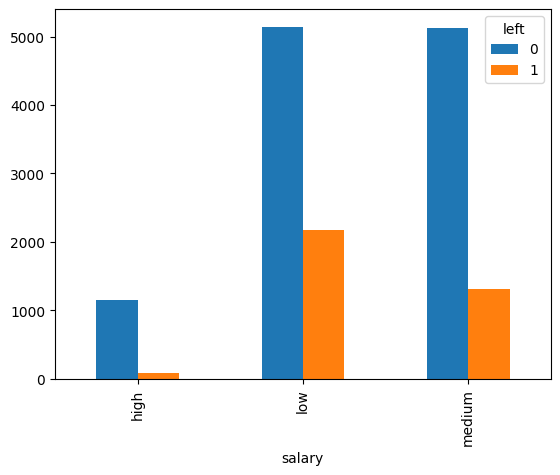

In [5]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

### Department wise employee retention rate

<Axes: xlabel='Department'>

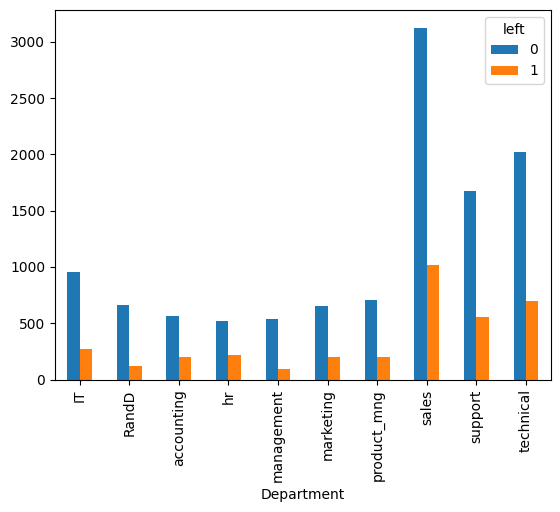

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model

1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [8]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
